## ESTANDARIZACION

---

In [75]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
from scipy import stats
import researchpy as rp
from scipy.stats import levene
from sklearn.preprocessing import RobustScaler

# Warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,15) 

In [146]:
df= pd.read_csv('../files/endesarrollo_normalizar.csv', index_col=0)

In [147]:
df.reset_index(inplace=True)

In [148]:
df.isnull().sum()

index                              0
country                            0
status                             0
continente                         0
year                               0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
measles                            0
bmi                                0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
thinness__1-19_years               0
income_composition_of_resources    0
schooling                          0
life_box                           0
dtype: int64

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:


---

### 1) Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.


In [149]:
numericas= df.select_dtypes(np.number)#Seleccionamos solo las variables numericas

numericas.drop(columns=['life_expectancy','year', "life_box", 'index'],axis=1,inplace=True)#Eliminamos la variable respuesta y la columna year

In [150]:
numericas.shape

(2410, 12)

In [151]:
numericas.columns

Index(['adult_mortality', 'infant_deaths', 'alcohol', 'measles', 'bmi',
       'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp',
       'thinness__1-19_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

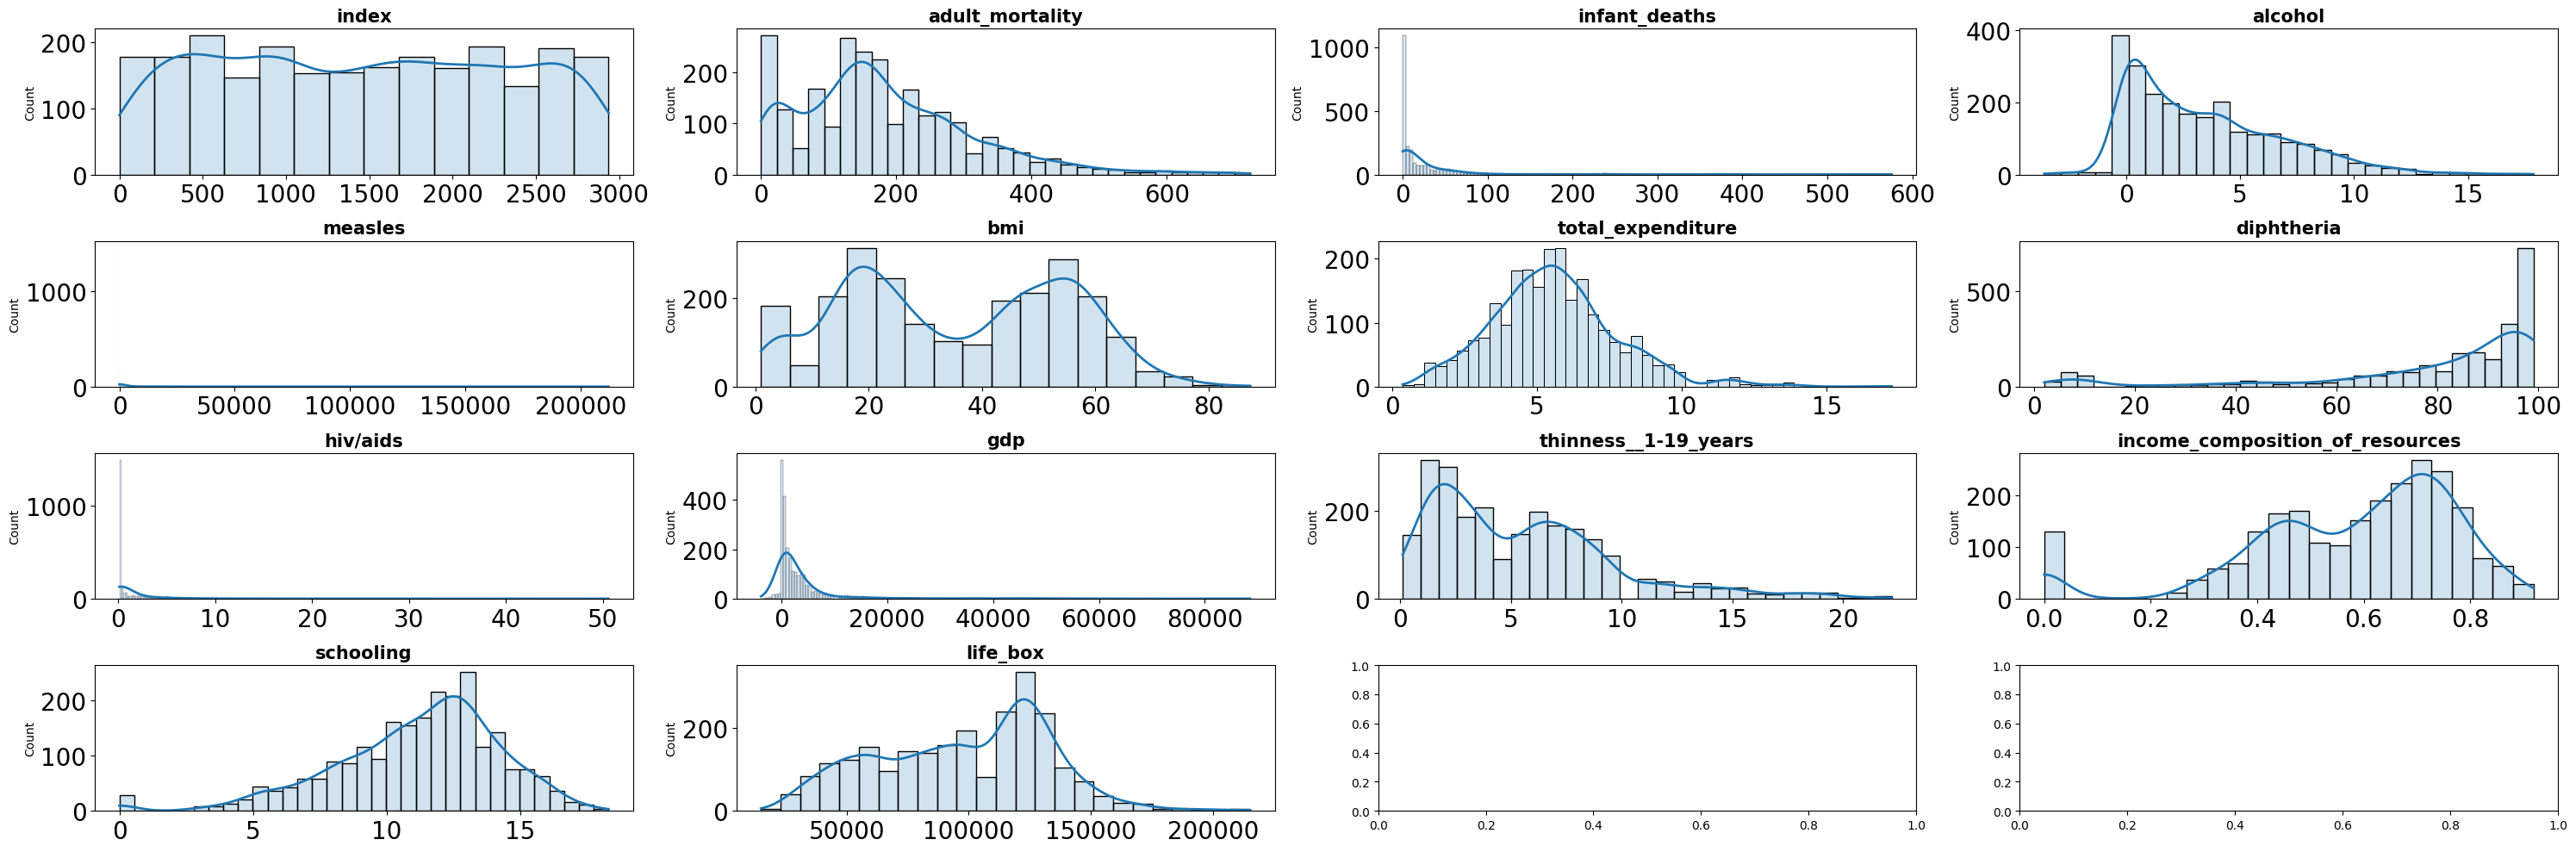

In [107]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 10))

columnas_estandar = numericas.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

`Debido a la cantidad de outliers qu tenemos en el dataframe hemos decidido aplicar el metodo RobustScaler para estandarizar las variables predictoras, ya que el mismo reduce los efectos de esos valores extremos.`

In [152]:
robust = RobustScaler()

In [153]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [154]:
x_robust= robust.transform(numericas)

In [155]:
numericas_robust= pd.DataFrame(x_robust,columns=numericas.columns)

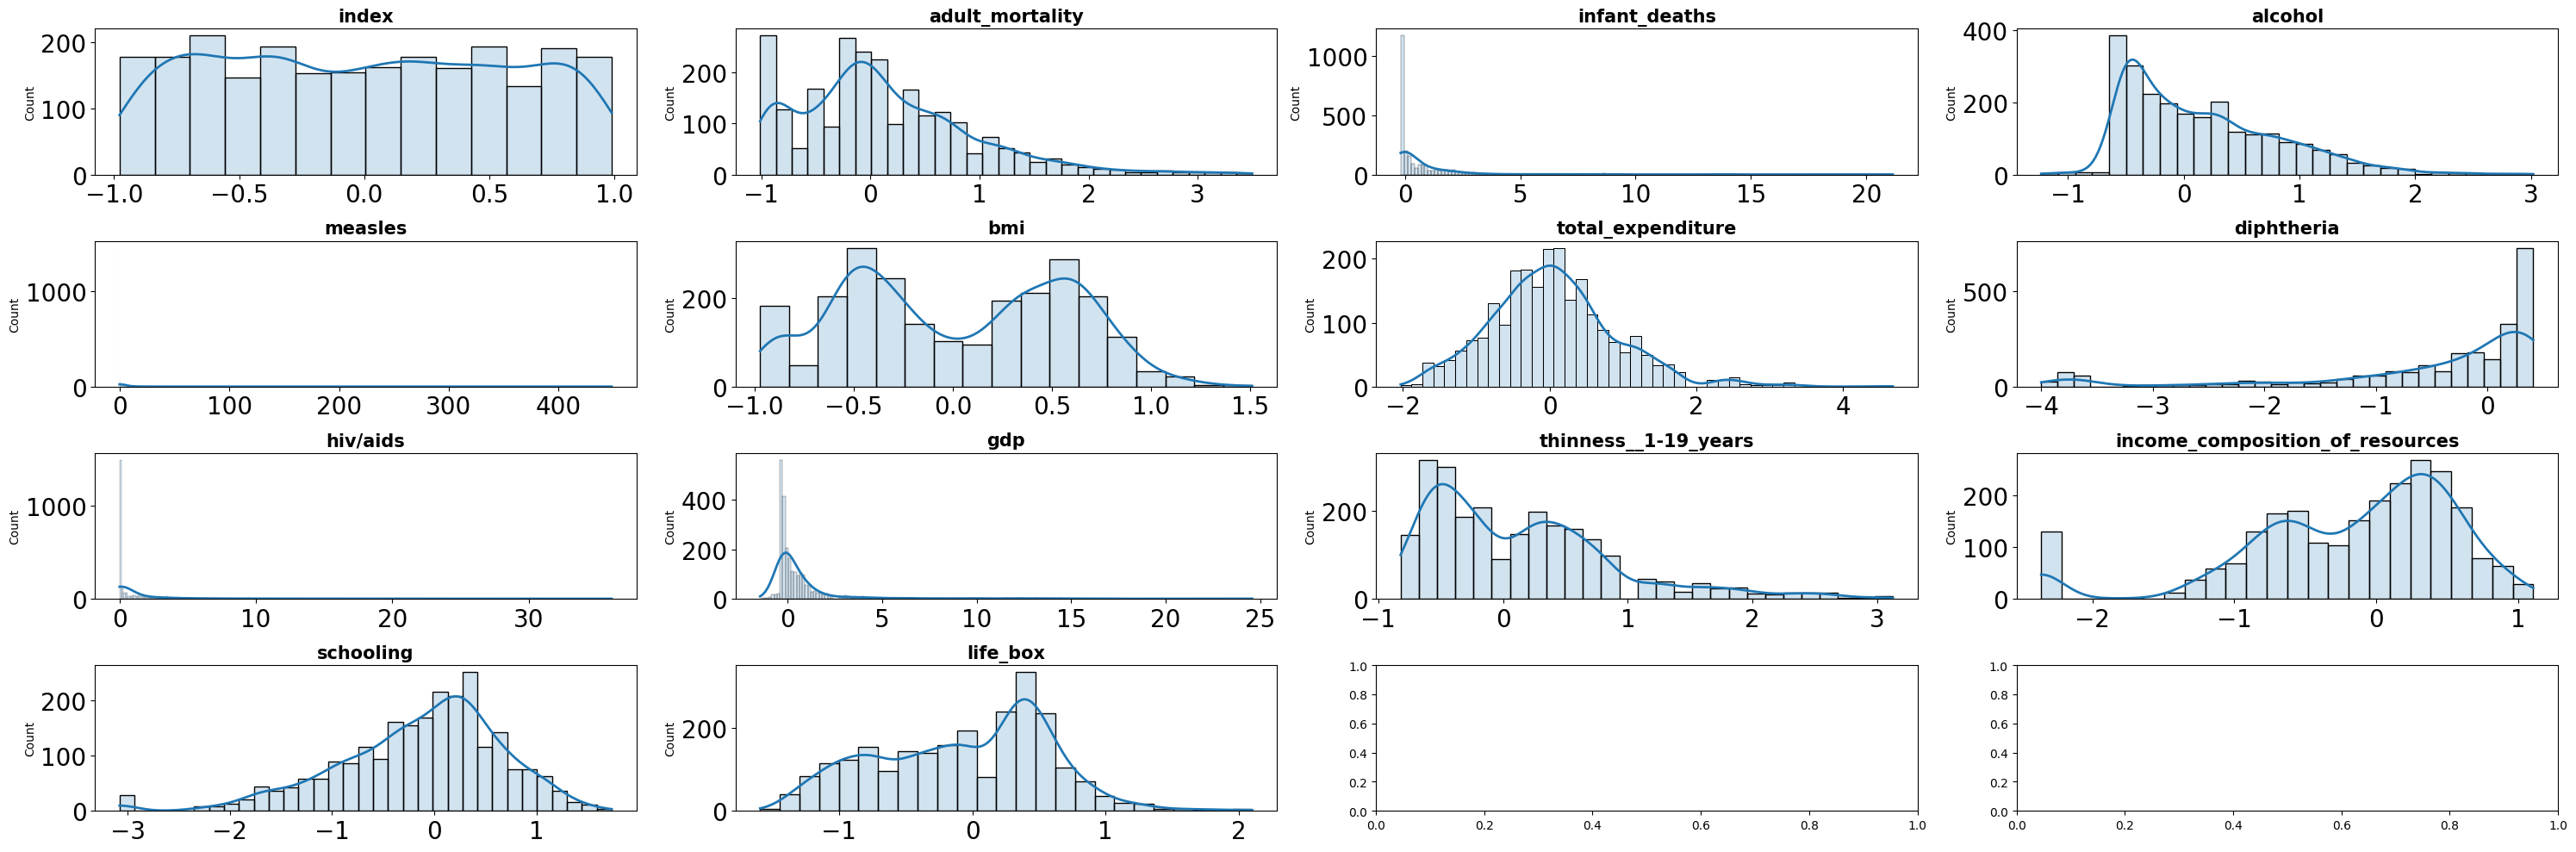

In [113]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 10))

columnas_estandar = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

`Vemos que las escalas de las diferentes variables se han estandarizado.`

---

In [157]:
df.head()

,index,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,income_composition_of_resources,schooling,life_box
0,0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,1154.0,19.1,8.16,65.0,0.1,584.259210,17.2,0.479,10.1,84427.620970
1,1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,492.0,18.6,8.18,62.0,0.1,612.696514,17.5,0.476,10.0,66186.905511
2,2,Afghanistan,Developing,Asia,2013.0,59.9,268.0,66.0,0.01,430.0,18.1,8.13,64.0,0.1,631.744976,17.7,0.470,9.9,66186.905511
3,3,Afghanistan,Developing,Asia,2012.0,59.5,272.0,69.0,0.01,2787.0,17.6,8.52,67.0,0.1,669.959000,17.9,0.463,9.8,64878.942872
4,4,Afghanistan,Developing,Asia,2011.0,59.2,275.0,71.0,0.01,3013.0,17.2,7.87,68.0,0.1,63.537231,18.2,0.454,9.5,63909.320770


In [158]:
df.isnull().sum()

index                              0
country                            0
status                             0
continente                         0
year                               0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
measles                            0
bmi                                0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
thinness__1-19_years               0
income_composition_of_resources    0
schooling                          0
life_box                           0
dtype: int64

In [159]:
numericas_robust.shape


(2410, 12)

`Vamos a crear el dataframe con las columnas estandarizadas.`

In [161]:
columnas_robust=numericas_robust.columns

In [162]:
numericas_robust.head(2)

,adult_mortality,infant_deaths,alcohol,measles,bmi,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,income_composition_of_resources,schooling
0,0.625,2.111111,-0.519069,2.402536,-0.451474,1.067594,-1.136364,0.0,-0.219529,2.232143,-0.553352,-0.421053
1,0.675,2.185185,-0.519069,1.003698,-0.465852,1.075547,-1.272727,0.0,-0.211517,2.285714,-0.564684,-0.447368


In [163]:
df.drop(columnas_robust, axis = 1, inplace = True)

In [164]:
df[columnas_robust] = numericas_robust[columnas_robust]

In [165]:
df.head()

,index,country,status,continente,year,life_expectancy,life_box,adult_mortality,infant_deaths,alcohol,measles,bmi,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,income_composition_of_resources,schooling
0,0,Afghanistan,Developing,Asia,2015.0,65.0,84427.620970,0.62500,2.111111,-0.519069,2.402536,-0.451474,1.067594,-1.136364,0.0,-0.219529,2.232143,-0.553352,-0.421053
1,1,Afghanistan,Developing,Asia,2014.0,59.9,66186.905511,0.67500,2.185185,-0.519069,1.003698,-0.465852,1.075547,-1.272727,0.0,-0.211517,2.285714,-0.564684,-0.447368
2,2,Afghanistan,Developing,Asia,2013.0,59.9,66186.905511,0.65625,2.259259,-0.519069,0.872689,-0.480230,1.055666,-1.181818,0.0,-0.206150,2.321429,-0.587347,-0.473684
3,3,Afghanistan,Developing,Asia,2012.0,59.5,64878.942872,0.68125,2.370370,-0.519069,5.853143,-0.494608,1.210736,-1.045455,0.0,-0.195384,2.357143,-0.613787,-0.500000
4,4,Afghanistan,Developing,Asia,2011.0,59.2,63909.320770,0.70000,2.444444,-0.519069,6.330692,-0.506111,0.952286,-1.000000,0.0,-0.366237,2.410714,-0.647781,-0.578947


In [166]:
df.isnull().sum()

index                              0
country                            0
status                             0
continente                         0
year                               0
life_expectancy                    0
life_box                           0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
measles                            0
bmi                                0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
thinness__1-19_years               0
income_composition_of_resources    0
schooling                          0
dtype: int64

---

### 2) Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings


In [168]:
df.to_csv('../files/endesarrollo_estandarizado.csv')